# Analyzing Google Play Store Data
      

## Installing Required Libraries 
    1] Numpy
    2] Pandas
    3] MatplotLib
    4] Seaborn
    5] Jovian
    
  Install all the Libraries Before Starting Your Project 

In [95]:
!pip install jovian opendatasets --upgrade --quiet


In [2]:
project_name = "Google-play-store-analysis"

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shrey2627/google-play-store-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shrey2627/google-play-store-analysis


'https://jovian.ai/shrey2627/google-play-store-analysis'

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Getting Dataset 
    Here we I am taking dataset from Kaggle 
    https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [8]:
apps_df = pd.read_csv("googleplaystore2.csv")


## Reading Dataset 
    Lets go through the entire dataset
    

In [9]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,Varies with device


In [10]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Android Ver     10838 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


In [11]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Android Ver'],
      dtype='object')

In [12]:
apps_df.shape

(10841, 11)

# Data Cleaning and Transforming
    Here we will perform some cleaning methods to remove Null values and change data types of columns 
    

In [13]:
apps_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

Here in the column Ratings we have one row with more than 5 value, Lets Drop the row.

In [14]:
apps_df.drop(apps_df[apps_df.Rating > 5].index, inplace = True)

In [15]:
apps_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

Rating Column have all the numeric value with object data type. So we need to change its data type to float from object.

In [16]:
apps_df.Reviews = pd.to_numeric(apps_df.Reviews)

Lets Process the Size and Install column 

In [17]:
apps_df.Size = apps_df.Size.apply(lambda x:x.replace('M','e+6'))
apps_df.Size = apps_df.Size.apply(lambda X:X.replace('k','e+3'))
apps_df.Size = apps_df.Size.replace("Varies with device",np.nan)

In [18]:
apps_df.Size = pd.to_numeric(apps_df.Size)

In [19]:
apps_df.Installs = apps_df.Installs.apply(lambda x:x.replace('+',''))
apps_df.Installs = apps_df.Installs.apply(lambda x:x.replace(',',''))

In [20]:
apps_df.Installs = pd.to_numeric(apps_df.Installs)

In [21]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0,Everyone,Education,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0,Everyone,Education,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000,Free,0,Everyone,Medical,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,Varies with device


Now lets Clean Type and Price Column 

In [26]:
apps_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [25]:
apps_df["Type"].fillna("Free", inplace = True)

In [28]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0,Everyone,Education,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0,Everyone,Education,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000,Free,0,Everyone,Medical,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,Varies with device


In [29]:
apps_df.Price = apps_df.Price.str.strip('$')

In [30]:
apps_df.Price = pd.to_numeric(apps_df.Price)

In [31]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1016.2+ KB


In [32]:
apps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [33]:
apps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

Lets Drop unnecessary columns 

In [34]:
apps_df.drop(['Android Ver'],axis=1,inplace=True)

In [35]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 931.6+ KB


# Data Visualization 
    Now Lets get some visuals from our Cleaned Dataset Using Python libraries like Seaborn and Matplotlib

#### Now lets see the Top 10 categories which has the highest number of Installed Applications 

In [36]:
most_instal = apps_df.groupby('Category').sum().sort_values(by = 'Installs',ascending = False).head(10)

In [37]:
most_instal

,Rating,Reviews,Size,Installs,Price
Category,,,,,
GAME,4702.1,1585422349,4.503565e+10,35086024415,287.30
COMMUNICATION,1364.0,815462260,3.118177e+09,32647276251,83.14
PRODUCTIVITY,1478.2,114116975,3.933369e+09,14176091369,250.93
SOCIAL,1102.2,621241422,3.713193e+09,14069867902,15.97
TOOLS,2970.8,273185044,6.481954e+09,11452771915,267.25
FAMILY,7323.9,410226330,5.188087e+10,10258263505,2434.78
PHOTOGRAPHY,1328.9,213516650,4.411387e+09,10088247655,134.21
NEWS_AND_MAGAZINES,962.8,54400863,2.813108e+09,7496317760,3.98
TRAVEL_AND_LOCAL,928.7,62617919,4.733663e+09,6868887146,49.95


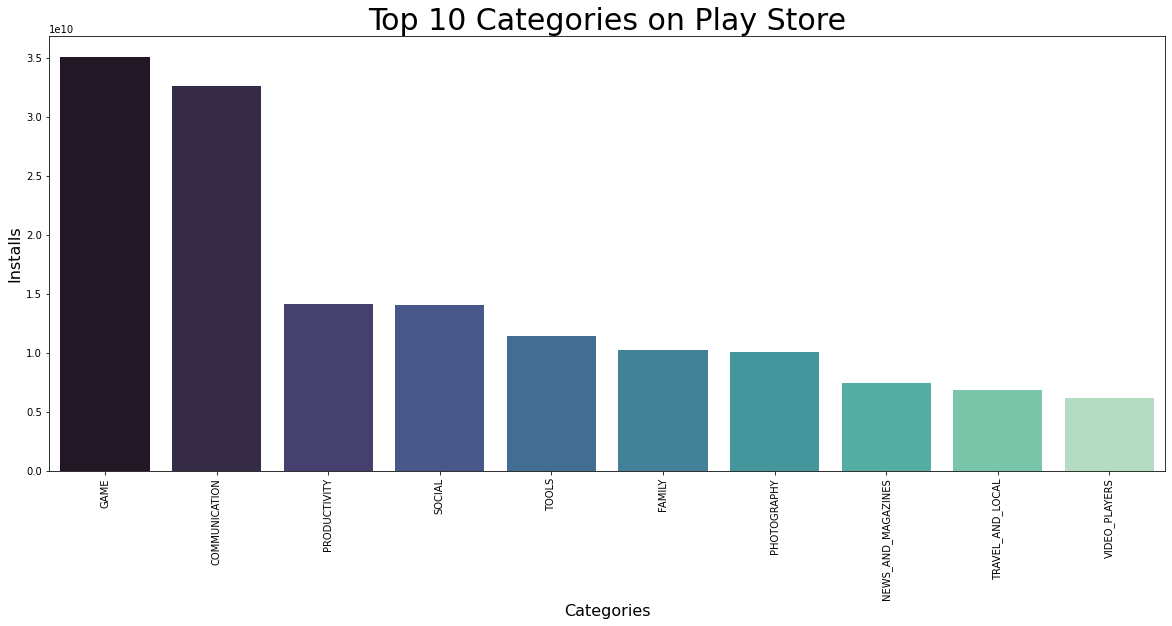

In [38]:
plt.figure(figsize=(20,8))
fig = sns.barplot(x = most_instal.index,y =most_instal.Installs,data = most_instal, palette = 'mako')
fig.set_xlabel('Categories',fontsize = 16)
fig.set_ylabel('Installs', fontsize = 16)
fig.set_xticklabels(fig.get_xticklabels(),rotation = 90,fontsize = 10)
fig.set_title('Top 10 Categories on Play Store', fontsize = 30)
plt.show()

#### Now Lets look the Categories which have highest sold applications 

In [39]:
most_sold = apps_df.groupby('Category').sum().sort_values(by = 'Price',ascending = False)

In [40]:
most_sold

,Rating,Reviews,Size,Installs,Price
Category,,,,,
FINANCE,1334.6,17550728,5.504070e+09,876648734,2900.83
FAMILY,7323.9,410226330,5.188087e+10,10258263505,2434.78
LIFESTYLE,1285.8,12882784,5.090302e+09,537643539,2360.87
MEDICAL,1466.2,1585975,8.519003e+09,53257437,1439.96
GAME,4702.1,1585422349,4.503565e+10,35086024415,287.30
TOOLS,2970.8,273185044,6.481954e+09,11452771915,267.25
PRODUCTIVITY,1478.2,114116975,3.933369e+09,14176091369,250.93
BUSINESS,1248.8,13954552,5.788865e+09,1001914865,185.27
PERSONALIZATION,1361.5,89346140,4.010843e+09,2325494782,153.96


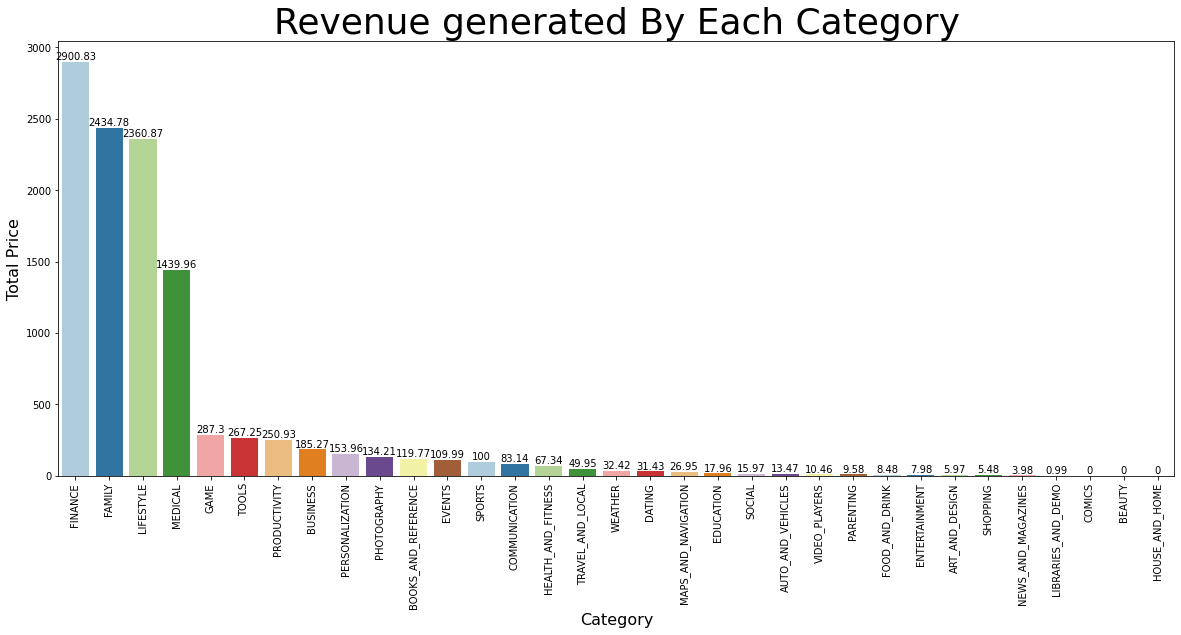

In [41]:
plt.figure(figsize=(20,8))
fig1 = sns.barplot(x = most_sold.index,y =most_sold.Price,data = most_sold, palette = 'Paired')
fig1.set_xlabel('Category',fontsize = 16)
fig1.set_ylabel('Total Price', fontsize = 16)
fig1.set_xticklabels(fig1.get_xticklabels(),rotation = 90,fontsize = 10)
fig1.set_title('Revenue generated By Each Category', fontsize = 36)
fig1.bar_label(fig1.containers[0])
plt.show()

#### Lets go through the highest Rated Categories 

In [42]:
top_rated = apps_df.groupby('Category').sum().sort_values(by = 'Rating',ascending = False).head(5)

In [43]:
top_rated

,Rating,Reviews,Size,Installs,Price
Category,,,,,
FAMILY,7323.9,410226330,5.188087e+10,10258263505,2434.78
GAME,4702.1,1585422349,4.503565e+10,35086024415,287.30
TOOLS,2970.8,273185044,6.481954e+09,11452771915,267.25
PRODUCTIVITY,1478.2,114116975,3.933369e+09,14176091369,250.93
MEDICAL,1466.2,1585975,8.519003e+09,53257437,1439.96


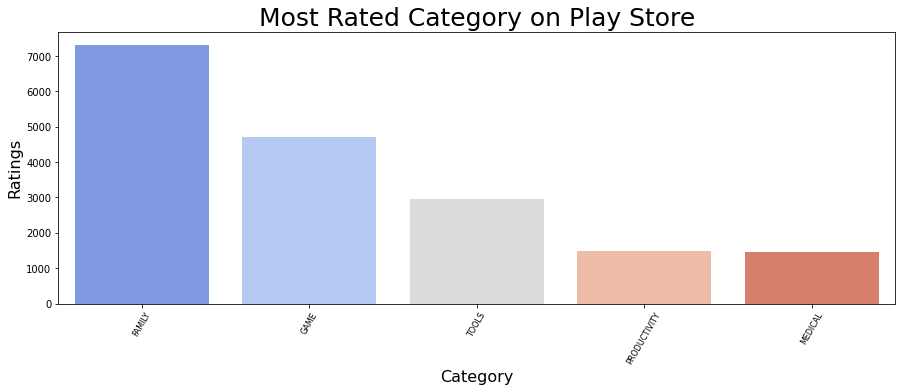

In [44]:
plt.figure(figsize=(15,5))
fig2 = sns.barplot(x = top_rated.index,y =top_rated.Rating,data = top_rated, palette = 'coolwarm')
fig2.set_xlabel('Category',fontsize = 16)
fig2.set_ylabel('Ratings', fontsize = 16)
fig2.set_xticklabels(fig2.get_xticklabels(),rotation = 60,fontsize = 8)
fig2.set_title('Most Rated Category on Play Store', fontsize = 25)
plt.show()

#### Lets look total number of Application under all the ratings 

In [45]:
total_rating = apps_df['Rating'].value_counts().head(15)

In [46]:
total_rating

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
Name: Rating, dtype: int64

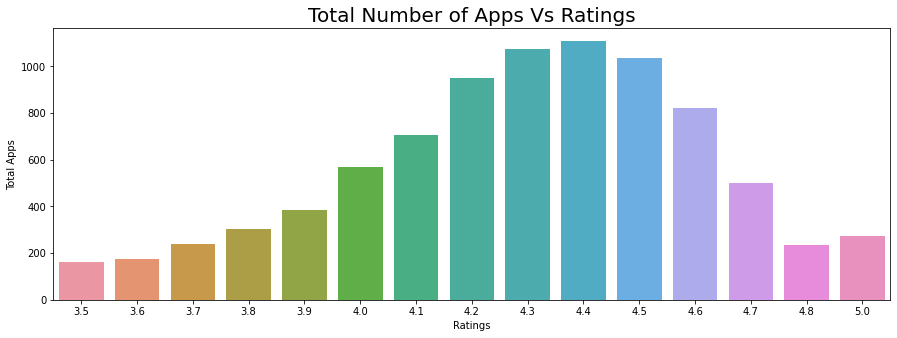

In [47]:
plt.figure(figsize=(15,5))
fig3 = sns.barplot(total_rating.index,total_rating)
fig3.set_xlabel('Ratings',fontsize = 10)
fig3.set_ylabel('Total Apps', fontsize = 10)
fig3.set_title('Total Number of Apps Vs Ratings', fontsize = 20)
plt.show()

#### Letss look what percentage of application are free and paid.

In [49]:
typo = apps_df['Type'].value_counts()

In [50]:
typo

Free    10040
Paid      800
Name: Type, dtype: int64

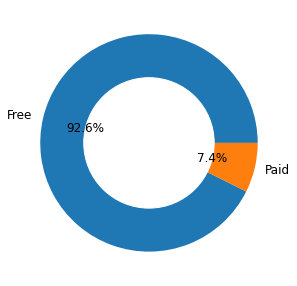

In [85]:
plt.figure(figsize=(15,5))
plt.pie(typo,labels=typo.index,autopct='%1.1f%%',textprops={'fontsize': 12})
fig4=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(fig4)

plt.show()

#### Lets look How many total application lies under each age restriction protocols on Play Store 

In [81]:
age_grp = apps_df['Content Rating'].value_counts()

In [82]:
age_grp

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

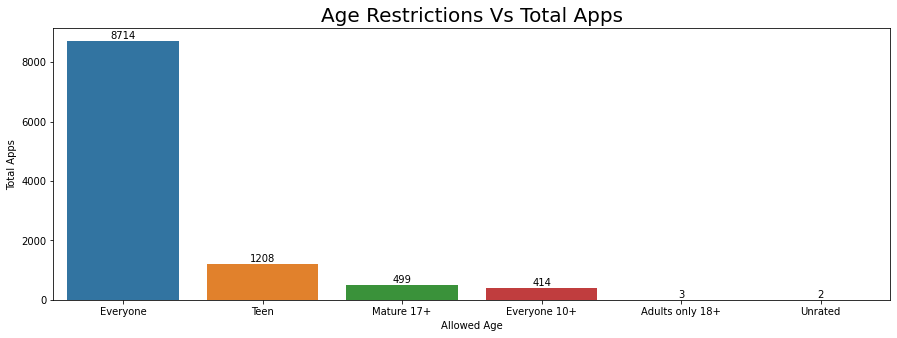

In [93]:
plt.figure(figsize=(15,5))
fig5 = sns.barplot(age_grp.index,age_grp)
fig5.set_xlabel('Allowed Age',fontsize = 10)
fig5.set_ylabel('Total Apps', fontsize = 10)
fig5.set_title('Age Restrictions Vs Total Apps', fontsize = 20)
fig5.bar_label(fig5.containers[0])

plt.show()

# Question and Answers 

First Lets Create a Copy of our Dataset in order to perform operations to answer below mentioned questions. Doing this will not harm our actual dataset.

In [120]:
apps_df_copy = apps_df.copy()

In [122]:
apps_df_copy.set_index('App', inplace=True)

In [123]:
apps_df_copy

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education
Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000,Free,0.0,Everyone,Medical


### Question 1] Which Application has the highest and the lowest Ratings?

Top 10 Highest Rated Apps

In [130]:
most_rated_apps = apps_df_copy['Rating'] == 5.0

In [131]:
apps_df_copy[most_rated_apps].head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
App,,,,,,,,,
Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000000.0,1000,Free,0.0,Everyone,Comics
American Girls Mobile Numbers,DATING,5.0,5,4400000.0,1000,Free,0.0,Mature 17+,Dating
Awake Dating,DATING,5.0,2,70000000.0,100,Free,0.0,Mature 17+,Dating
Spine- The dating app,DATING,5.0,5,9300000.0,500,Free,0.0,Teen,Dating
Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5000000.0,100,Free,0.0,Mature 17+,Dating
Online Girls Chat Group,DATING,5.0,5,5000000.0,100,Free,0.0,Mature 17+,Dating
Speeding Joyride & Car Meet App,DATING,5.0,3,25000000.0,100,Free,0.0,Mature 17+,Dating
SUMMER SONIC app,EVENTS,5.0,4,61000000.0,500,Free,0.0,Everyone,Events
Prosperity,EVENTS,5.0,16,2300000.0,100,Free,0.0,Everyone,Events


Top 10 Least Rated Apps

In [132]:
least_rated_apps = apps_df_copy['Rating'] <=1.0

In [133]:
apps_df_copy[least_rated_apps].head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
App,,,,,,,,,
House party - live chat,DATING,1.0,1,9200000.0,10,Free,0.00,Mature 17+,Dating
Speech Therapy: F,FAMILY,1.0,1,16000000.0,10,Paid,2.99,Everyone,Education
Clarksburg AH,MEDICAL,1.0,1,28000000.0,50,Free,0.00,Everyone,Medical
Truck Driving Test Class 3 BC,FAMILY,1.0,1,2000000.0,50,Paid,1.49,Everyone,Education
BJ Bridge Standard American 2018,GAME,1.0,1,4900000.0,1000,Free,0.00,Everyone,Card
MbH BM,MEDICAL,1.0,1,2300000.0,100,Free,0.00,Everyone,Medical
CB Mobile Biz,FINANCE,1.0,3,8400000.0,500,Free,0.00,Everyone,Finance
Thistletown CI,PRODUCTIVITY,1.0,1,6600000.0,100,Free,0.00,Everyone,Productivity
CJ DVD Rentals,COMMUNICATION,1.0,5,13000000.0,100,Free,0.00,Everyone,Communication


### Question 2] Which applications has the highest and lowest reviews?

Top 10 Applications with the highest Reviews 

In [128]:
highest_review = apps_df_copy['Reviews'].sort_values(ascending = False).head(10)

In [129]:
highest_review

App
Facebook                                    78158306
Facebook                                    78128208
WhatsApp Messenger                          69119316
WhatsApp Messenger                          69119316
WhatsApp Messenger                          69109672
Instagram                                   66577446
Instagram                                   66577313
Instagram                                   66577313
Instagram                                   66509917
Messenger – Text and Video Chat for Free    56646578
Name: Reviews, dtype: int64

Top 10 Applications with the lowest Reviews 

In [134]:
lowest_review = apps_df_copy['Reviews'].sort_values(ascending = True).head(10)

In [136]:
lowest_review

App
BAR-B-Q Recipes                                       0
SHUTTLLS CQ - Connect Ride Go                         0
CQ Ukraine                                            0
EG | Explore Folegandros                              0
CQ Electrical Group                                   0
25WPM Amateur ham radio Koch CW Morse code trainer    0
Cypress College Library                               0
qEG APP / Química EG SRL                              0
Create My App                                         0
Global Shop                                           0
Name: Reviews, dtype: int64

### Question 3] Which Application is the biggest in Size?

In [137]:
big_app = apps_df_copy['Size'].sort_values(ascending = False).head(5)

In [138]:
big_app

App
Mini Golf King - Multiplayer Game    100000000.0
Ultimate Tennis                      100000000.0
Hungry Shark Evolution               100000000.0
SimCity BuildIt                      100000000.0
Talking Babsy Baby: Baby Games       100000000.0
Name: Size, dtype: float64

### Question 4] How many Application have more the one million Downloads?

In [139]:
one_mil = apps_df_copy['Installs']>10e+6 

In [141]:
apps_df_copy[one_mil]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
App,,,,,,,,,
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference
Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,NaN,100000000,Free,0.0,Teen,Books & Reference
Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference
Indeed Job Search,BUSINESS,4.3,674730,NaN,50000000,Free,0.0,Everyone,Business
...,...,...,...,...,...,...,...,...,...
Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000000.0,50000000,Free,0.0,Everyone,Casual
Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000000.0,50000000,Free,0.0,Everyone,Simulation
Toy Truck Rally 3D,GAME,4.0,301895,25000000.0,50000000,Free,0.0,Everyone,Racing


In [142]:
len_app = len(apps_df_copy[one_mil])

In [143]:
print("There are {} apps with more than one millions downloads".format(len_app))

There are 828 apps with more than one millions downloads


### Question 5] Which is the Costliest and Cheapest Paid Application on Google Play Store?

Costliest Application on Google Play Store 

In [146]:
cost_app = apps_df_copy['Price'].sort_values(ascending = False).head(1)

In [147]:
cost_app

App
I'm Rich - Trump Edition    400.0
Name: Price, dtype: float64

Cheapest Paid Application on Google Play Store

In [148]:
cheap_apps = apps_df_copy['Price']!=0 

In [156]:
apps_df_copy[cheap_apps].sort_values(by = 'Price',ascending = True).head(1)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
App,,,,,,,,,
Little Magnet BT Pro,TOOLS,4.6,251,3800000.0,1000,Paid,0.99,Everyone,Tools


In [161]:
!pip install jovian --upgrade --quiet

In [162]:
import jovian


In [ ]:
jovian.commit(outputs=['googleplaystore2.csv'])

<IPython.core.display.Javascript object>

In [160]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shrey2627/google-play-store-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shrey2627/google-play-store-analysis


'https://jovian.ai/shrey2627/google-play-store-analysis'